Title: Vehicle Data Analysis

In [37]:
# Importing required libraries for data preparation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Data Loading and preparation

In [38]:
# Loading dataset
data = pd.read_csv('Taabi_data.csv')
data.sample(5)

uniqueid          ts        lat        lng  external_bat_voltage  \
3573   it_220403501  1710006126  18.798819  78.349693                   NaN   
2642   it_220403501  1709859689  18.145666  78.935547                   NaN   
6102   it_220403501  1711120711  19.034353  79.358414                   NaN   
17888  it_220403501  1713557655  18.172047  78.832207                   NaN   
16270  it_220403501  1713286557  18.943142  79.079750                   NaN   

       internal_bat_voltage  engineload  tanklevel  throttle  coolant  ...  \
3573                    NaN          62        NaN       NaN       86  ...   
2642                    NaN          68        NaN       NaN       92  ...   
6102                    NaN          51        NaN       NaN       85  ...   
17888                   NaN           5        NaN       NaN       85  ...   
16270                   NaN          64        NaN       NaN       91  ...   

       live_location  to_be_expired_at  status  event_id  \
3573             NaN               NaN     NaN       NaN   
2642             NaN               NaN     NaN       NaN   
6102             NaN               NaN     NaN       NaN   
17888            NaN               NaN     NaN       NaN   
16270            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
3573                                NaN             NaN   
2642                                NaN             NaN   
6102                                NaN             NaN   
17888                               NaN             NaN   
16270                               NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
3573                             NaN                 NaN   
2642                             NaN                 NaN   
6102                             NaN                 NaN   
17888                            NaN                 NaN   
16270                            NaN                 NaN   

       exhaust_gas_temperature  adblue_level  
3573                       NaN           NaN  
2642                       NaN           NaN  
6102                       NaN          88.4  
17888                      NaN          68.8  
16270                      NaN          99.2  

[5 rows x 141 columns]

In [39]:
# Sahpe of the dataset
print('Shape the dataset: ',data.shape)

Shape the dataset:  (18434, 141)


In [40]:
# Description of data
data.describe()

ts           lat           lng  external_bat_voltage  \
count  1.843400e+04  18434.000000  18434.000000                   0.0   
mean   1.711641e+09     18.724254     78.865351                   NaN   
std    1.275937e+06      0.816184      3.208032                   NaN   
min    1.709341e+09      0.000000      0.000000                   NaN   
25%    1.710903e+09     18.701308     78.758909                   NaN   
50%    1.711692e+09     18.853032     79.092408                   NaN   
75%    1.712682e+09     18.921385     79.352821                   NaN   
max    1.713636e+09     19.069500     79.481804                   NaN   

       internal_bat_voltage    engineload  tanklevel  throttle       coolant  \
count                   0.0  18434.000000        0.0       0.0  18434.000000   
mean                    NaN     38.141206        NaN       NaN     84.571336   
std                     NaN     29.889358        NaN       NaN      7.718346   
min                     NaN      0.000000        NaN       NaN     30.000000   
25%                     NaN     10.000000        NaN       NaN     83.000000   
50%                     NaN     31.000000        NaN       NaN     85.000000   
75%                     NaN     64.000000        NaN       NaN     89.000000   
max                     NaN    100.000000        NaN       NaN     98.000000   

       intakeairtemp  ...  live_location  to_be_expired_at  status  event_id  \
count            0.0  ...            0.0               0.0     0.0       0.0   
mean             NaN  ...            NaN               NaN     NaN       NaN   
std              NaN  ...            NaN               NaN     NaN       NaN   
min              NaN  ...            NaN               NaN     NaN       NaN   
25%              NaN  ...            NaN               NaN     NaN       NaN   
50%              NaN  ...            NaN               NaN     NaN       NaN   
75%              NaN  ...            NaN               NaN     NaN       NaN   
max              NaN  ...            NaN               NaN     NaN       NaN   

       particulated_trap_inlet_pressure  boost_pressure  \
count                               0.0             0.0   
mean                                NaN             NaN   
std                                 NaN             NaN   
min                                 NaN             NaN   
25%                                 NaN             NaN   
50%                                 NaN             NaN   
75%                                 NaN             NaN   
max                                 NaN             NaN   

       intake_manifold_1_temperature  air_inlet_pressure  \
count                            0.0                 0.0   
mean                             NaN                 NaN   
std                              NaN                 NaN   
min                              NaN                 NaN   
25%                              NaN                 NaN   
50%                              NaN                 NaN   
75%                              NaN                 NaN   
max                              NaN                 NaN   

       exhaust_gas_temperature  adblue_level  
count                      0.0  14770.000000  
mean                       NaN     84.795315  
std                        NaN     15.571199  
min                        NaN     44.400000  
25%                        NaN     68.800000  
50%                        NaN     88.400000  
75%                        NaN     99.200000  
max                        NaN    100.000000  

[8 rows x 135 columns]

In [41]:
# Dataset information (Total entries,total columns,and data-types)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [42]:
# Cheking null values in the dataset
data.isnull().sum()

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64

In [43]:
# After checking null values, we come to know that most of the columns are completely empty
# We will remove all such columns as they are not going to contribute in furher processing and analysis
# Remove columns that have all null values4

#original columns count
original_columns_count = data.shape[1]

data.dropna(axis=1, how='all',inplace = True)

# removing uniqueid
data.drop(columns='uniqueid',inplace=True)

# Checking the shape of the DataFrame to verify columns were removed
print(f"Original number of columns: {original_columns_count}")
print(f"Number of columns after cleaning: {data.shape[1]}")


Original number of columns: 141
Number of columns after cleaning: 32


In [44]:
# After removing empty columns and uniqueid, the data will look as following
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ts                                    18434 non-null  int64  
 1   lat                                   18434 non-null  float64
 2   lng                                   18434 non-null  float64
 3   engineload                            18434 non-null  int64  
 4   coolant                               18434 non-null  int64  
 5   engineoiltemp                         18434 non-null  float64
 6   vehiclespeed                          18434 non-null  float64
 7   rpm                                   18434 non-null  float64
 8   obddistance                           18434 non-null  int64  
 9   runtime                               18420 non-null  float64
 10  engine_torque_percent                 18434 non-null  int64  
 11  selected_gear  

In [45]:
# Extracting range of values for all features
for i in data.columns:
    minimum = data[i].min()
    maximum = data[i].max()
    print(f"for {i}: {minimum} to {maximum}")

for ts: 1709340731 to 1713636120
for lat: 0.0 to 19.0695
for lng: 0.0 to 79.481804
for engineload: 0 to 100
for coolant: 30 to 98
for engineoiltemp: 1774.9688 to 1774.9688
for vehiclespeed: 0.0 to 81.703125
for rpm: 0.0 to 2011.25
for obddistance: 60780800 to 71874816
for runtime: 1970.85 to 2287.1
for engine_torque_percent: 0 to 80
for selected_gear: 130 to 130
for current_gear: 0 to 129
for fuel_consumption: 17935.5 to 21059.0
for fuel_level: 0.4 to 100.0
for fl_level: 0.0 to 365.0
for fuel_rate: 0.0 to 36.4
for fuel_economy: 0.0 to 125.5
for accelerator_pedal_pos: 0.0 to 100.0
for pluscode: 6FG22222+ to 7JFX3C32+
for vibration_status: 0 to 0
for can_raw_data: 0CF00300:C0B109FFFF0C3F7E,0CF00400:7484841C2B000484,18FEF200:4100031FC006FAFF,18FEEE00:82FFFFFFFFFFFFFF,18FEE900:E0910000DC910000,18FE5600:7D50FFFF1F1F00FF,18FEE500:CA9F00008E1F0100,18FEF100:F32C320FFFFFFFFF,18FEFC17:FF77FFFFFFFFFEFF,18FEC100:20A4C100B8A6C100,18F00500:FFB4047DFFFFFFFF to 0CF00300:D4FA64FFFF4CBD7E,0CF00400:58C9C

In [46]:
# Some features in the dataset has same value for all the records, so it should be removed as it not going to contribute to further analysis process

# Dropping all columns that has same value for all records
data = data.loc[:, (data != data.iloc[0]).any()]

data.columns



Index(['ts', 'lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm',
       'obddistance', 'runtime', 'engine_torque_percent', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'pluscode', 'can_raw_data',
       'engine_throttle_valve1_pos', 'drivers_demand_engine_torque_percent',
       'engine_torque_mode', 'brake_switch_status', 'clutch_switch_status',
       'parking_switch_status', 'adblue_level'],
      dtype='object')

In [47]:
# can_raw_data is not interpreatble as we dont have proper documentation to decode CAN raw data
# It can create complexity in analysis process, so we will remove that also

#removing can_raw_data
data = data.drop(columns=['can_raw_data'])


#as pluscode will be used to extract latitude and longitude, we can drop that column as we already have this information form lat and lng feature
data = data.drop(columns=['pluscode'])



In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ts                                    18434 non-null  int64  
 1   lat                                   18434 non-null  float64
 2   lng                                   18434 non-null  float64
 3   engineload                            18434 non-null  int64  
 4   coolant                               18434 non-null  int64  
 5   vehiclespeed                          18434 non-null  float64
 6   rpm                                   18434 non-null  float64
 7   obddistance                           18434 non-null  int64  
 8   runtime                               18420 non-null  float64
 9   engine_torque_percent                 18434 non-null  int64  
 10  current_gear                          18434 non-null  int64  
 11  fuel_consumptio

2. Data cleaning and preprocessing

In [49]:
# Checking duplicate records
duplicate_count = data.duplicated().sum()
print(f'Number of duplicate records: {duplicate_count}')

Number of duplicate records: 0


In [50]:
# Checking percentage of missing values for each feature
(data.isnull().sum()/data.shape[0]*100).round(3)

ts                                       0.000
lat                                      0.000
lng                                      0.000
engineload                               0.000
coolant                                  0.000
vehiclespeed                             0.000
rpm                                      0.000
obddistance                              0.000
runtime                                  0.076
engine_torque_percent                    0.000
current_gear                             0.000
fuel_consumption                         0.000
fuel_level                               0.011
fl_level                                 0.000
fuel_rate                                0.000
fuel_economy                             0.000
accelerator_pedal_pos                    0.000
engine_throttle_valve1_pos               0.000
drivers_demand_engine_torque_percent     0.000
engine_torque_mode                       0.000
brake_switch_status                      0.000
clutch_switch

In [51]:
# Now, we can see that there are almost 0% missing values in all columns except adblue_level
# We can drop records which contains null values from runtime and fuel_level

data= data.dropna(subset=['runtime', 'fuel_level'])

# Verifying that there are no more missing values in the specified columns
print(data.isnull().sum())



ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                    0
engine_torque_percent                      0
current_gear                               0
fuel_consumption                           0
fuel_level                                 0
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
engine_throttle_valve1_pos                 0
drivers_demand_engine_torque_percent       0
engine_torque_mode                         0
brake_switch_status                        0
clutch_switch_status                       0
parking_sw

In [52]:
# For handling missing values of adblue_level, we can prepare dataset and build machine learning model to fill the missing values

# Selecting columns with numeric data types for machine learning model
numeric_data = data.select_dtypes(include=['int32', 'float64','int64'])

numeric_data.columns

Index(['ts', 'lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm',
       'obddistance', 'runtime', 'engine_torque_percent', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
       'drivers_demand_engine_torque_percent', 'engine_torque_mode',
       'adblue_level'],
      dtype='object')

In [53]:
# Training a RandomForestRegressor to fill the missing values
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Training data where AdBlue level has no missing values
known_data = numeric_data[numeric_data['adblue_level'].notna()]

# Data that has missing values in the adblue_level feature (test data)
unknown_data = numeric_data[numeric_data['adblue_level'].isna()]

# Splitting into Independent(X) and dependent(y) varibales
X = known_data.drop(columns=['adblue_level'])
y = known_data['adblue_level']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")




Mean Absolute Error: 0.09860975609766563
Mean Squared Error: 0.39876234146341616
R-squared: 0.9983862713521361


In [54]:
# As we have got good R score, we can move ahead with this model to fill the missing values

# Predicting missing AdBlue values in the unknown_data
X_unknown = unknown_data.drop(columns=['adblue_level'])
predicted_adblue = model.predict(X_unknown)

# Adding predicted values back to the original dataframe
data.loc[data['adblue_level'].isna(), 'adblue_level'] = predicted_adblue

In [55]:
# Now there will be no issing values in the dataset
data.isnull().sum()

ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
engine_throttle_valve1_pos              0
drivers_demand_engine_torque_percent    0
engine_torque_mode                      0
brake_switch_status                     0
clutch_switch_status                    0
parking_switch_status                   0
adblue_level                      

In [56]:
# There are some columns that contains categorical values, we need to encode them

from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['brake_switch_status', 'clutch_switch_status', 'parking_switch_status']

# Applying label encoding to selected columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


print(data[columns_to_encode].head())

   brake_switch_status  clutch_switch_status  parking_switch_status
0                    1                     1                      0
1                    1                     0                      0
2                    0                     0                      1
3                    1                     0                      1
4                    1                     0                      1


In [57]:
# Now all the data types will be float and int, so our data is ready for further processing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18418 entries, 0 to 18433
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ts                                    18418 non-null  int64  
 1   lat                                   18418 non-null  float64
 2   lng                                   18418 non-null  float64
 3   engineload                            18418 non-null  int64  
 4   coolant                               18418 non-null  int64  
 5   vehiclespeed                          18418 non-null  float64
 6   rpm                                   18418 non-null  float64
 7   obddistance                           18418 non-null  int64  
 8   runtime                               18418 non-null  float64
 9   engine_torque_percent                 18418 non-null  int64  
 10  current_gear                          18418 non-null  int64  
 11  fuel_consumption    

Handling outliers


Skewness of each feature:
engineload                               0.344900
coolant                                 -2.882056
vehiclespeed                            -0.627619
rpm                                     -1.016181
obddistance                             -0.047455
runtime                                 -0.031916
engine_torque_percent                    0.369125
fuel_consumption                        -0.033921
fuel_level                              -0.067748
fl_level                                -0.067748
fuel_rate                                0.496901
fuel_economy                             1.791553
accelerator_pedal_pos                    0.277265
engine_throttle_valve1_pos             -14.248507
drivers_demand_engine_torque_percent     0.330915
engine_torque_mode                       1.030874
adblue_level                            -0.263085
dtype: float64


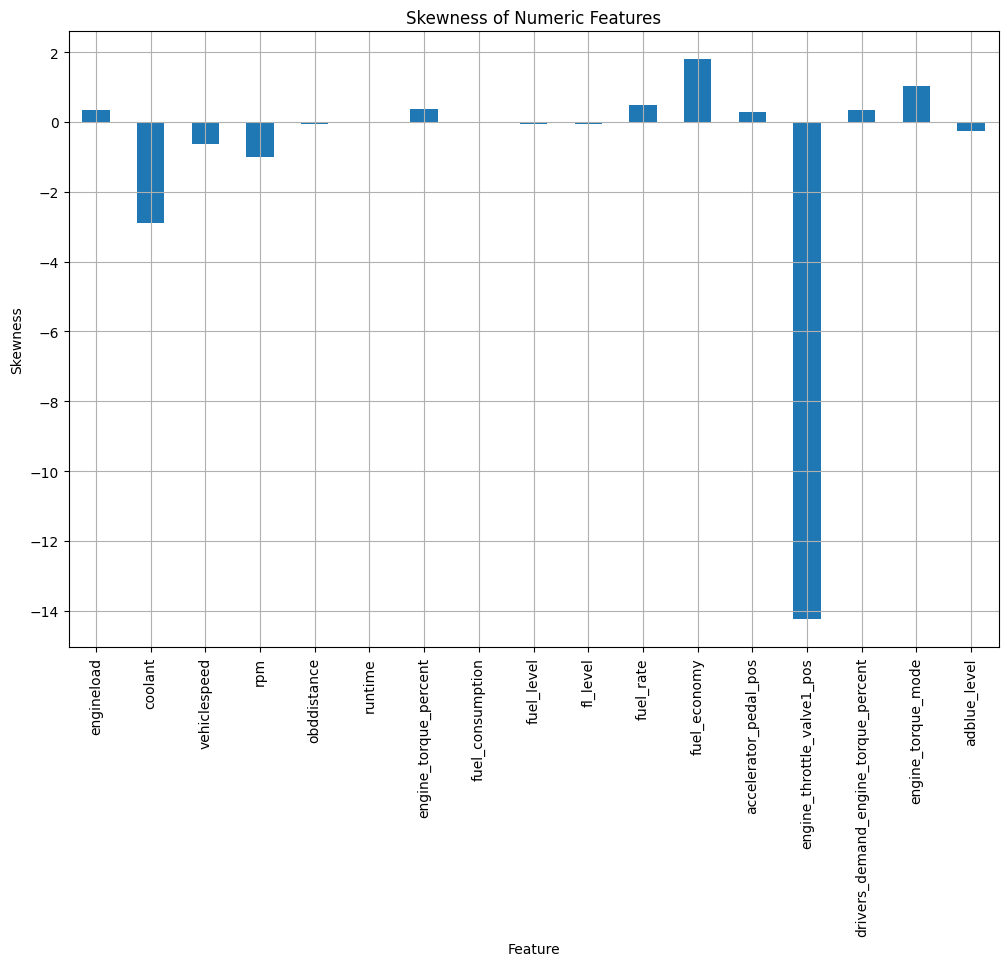

In [58]:
#first we will see the skewness of the data

numeric_columns = [
    'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level',
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Compute skewness for each numeric column
skewness = data[numeric_columns].skew()

# Print skewness values
print("Skewness of each feature:")
print(skewness)

# Plot skewness for each feature
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [59]:
# We can see that the features fuel_economy and engine_torque mode are right-skewed, we will apply log transformation on both the features
data['fuel_economy'] = np.log1p(data['fuel_economy'])
data['engine_torque_mode'] = np.log1p(data['engine_torque_mode'])

# In addition to this,the features engine_throttla_valve1_pos, rpm and coolant are left-skewed, we will boccox transform on all the three features
from scipy import stats
data['coolant'], _ = stats.boxcox(data['coolant'] + 1) 
data['engine_throttle_valve1_pos'], _ = stats.boxcox(data['engine_throttle_valve1_pos'])


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1259: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1271: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


Skewness of each feature:
engineload                              0.344900
coolant                                -0.032083
vehiclespeed                           -0.627619
rpm                                    -1.016181
obddistance                            -0.047455
runtime                                -0.031916
engine_torque_percent                   0.369125
fuel_consumption                       -0.033921
fuel_level                             -0.067748
fl_level                               -0.067748
fuel_rate                               0.496901
fuel_economy                            0.765574
accelerator_pedal_pos                   0.277265
engine_throttle_valve1_pos                   NaN
drivers_demand_engine_torque_percent    0.330915
engine_torque_mode                      0.681001
adblue_level                           -0.263085
dtype: float64


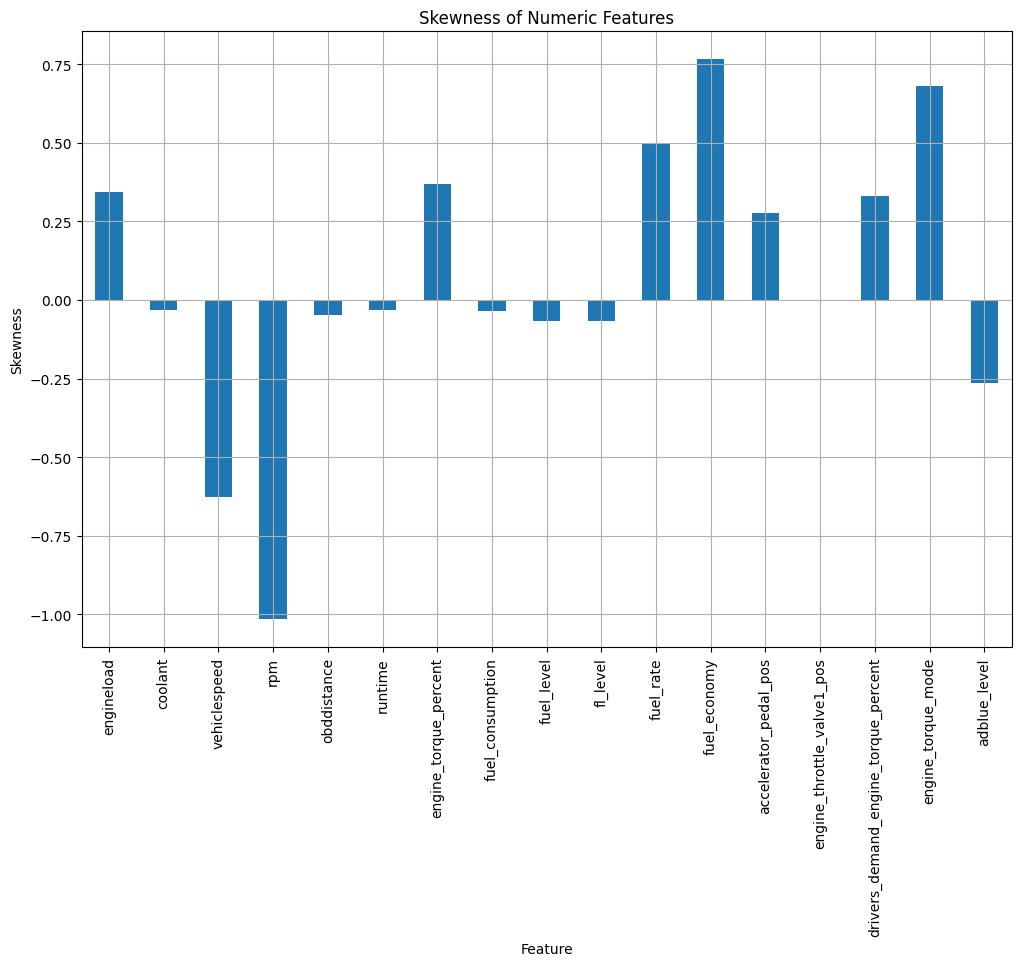

In [60]:
# Assuming 'data' is your DataFrame with numeric columns
# numeric_columns = [
#     'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
#     'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level',
#     'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'engine_throttle_valve1_pos',
#     'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
# ]

# Compute skewness for each numeric column
skewness = data[numeric_columns].skew()

# Print skewness values
print("Skewness of each feature:")
print(skewness)

# Plot skewness for each feature
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


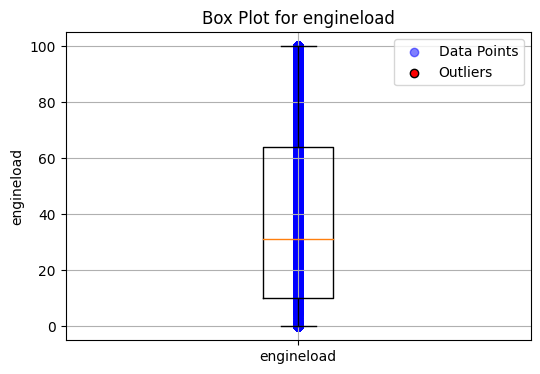

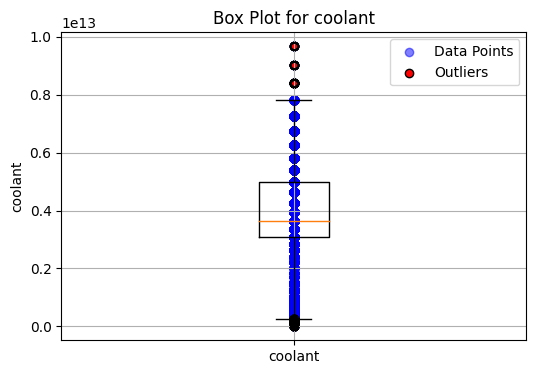

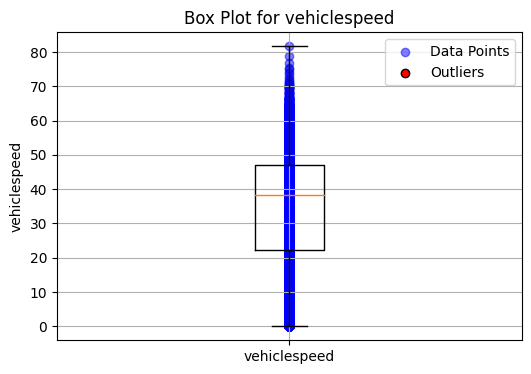

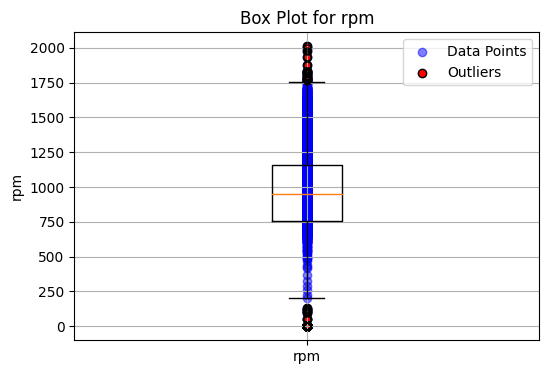

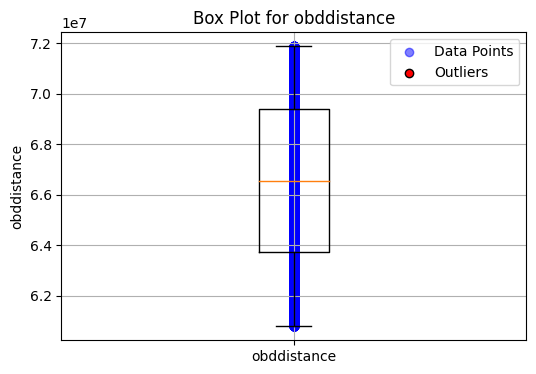

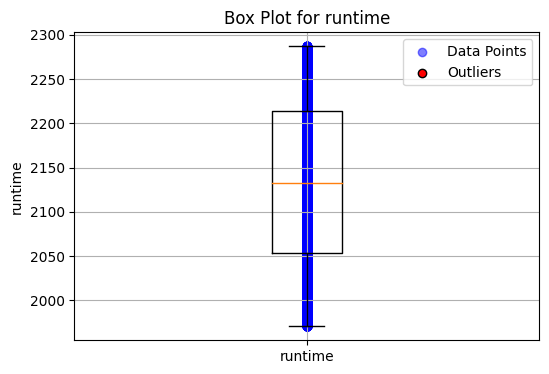

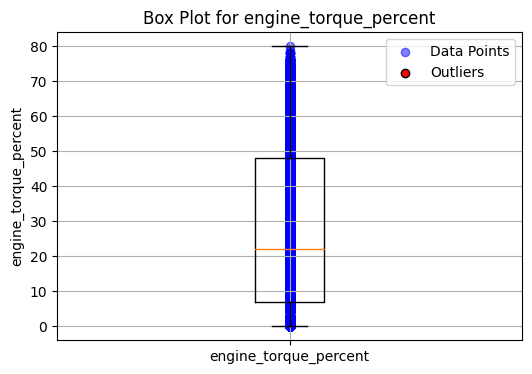

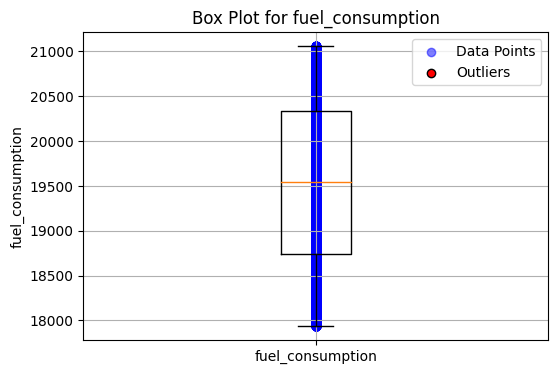

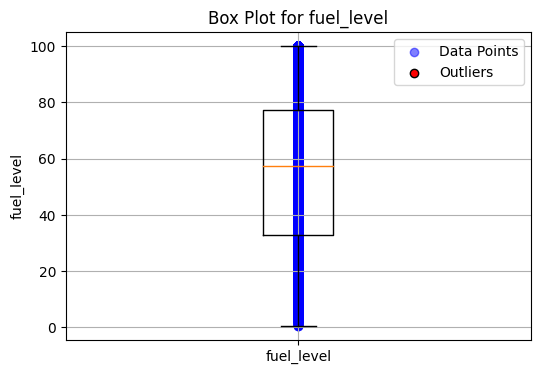

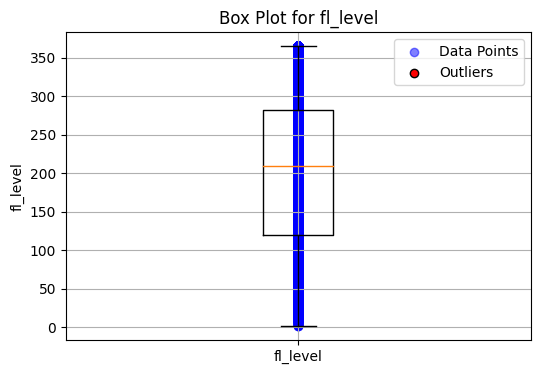

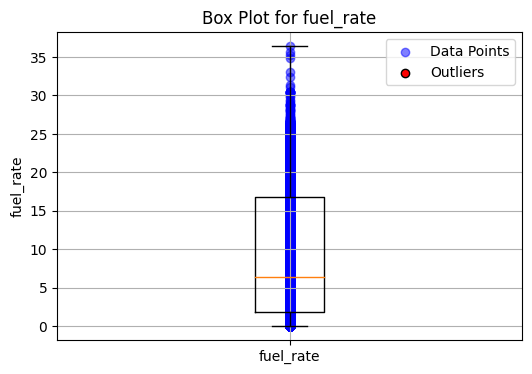

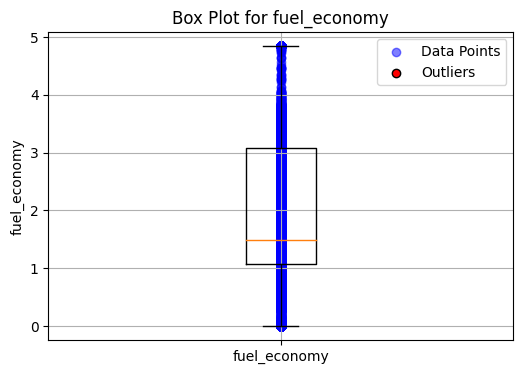

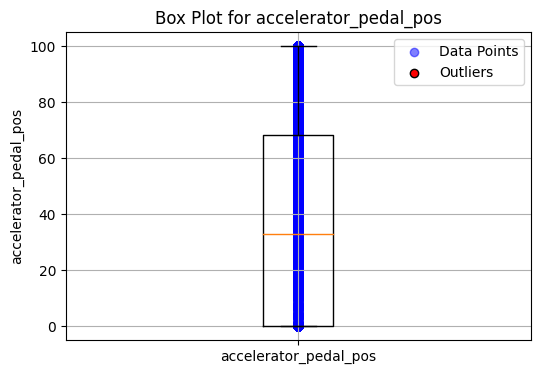

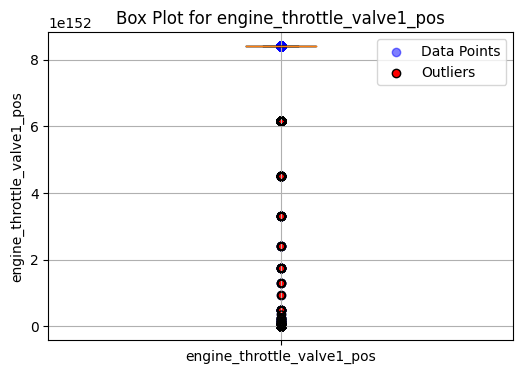

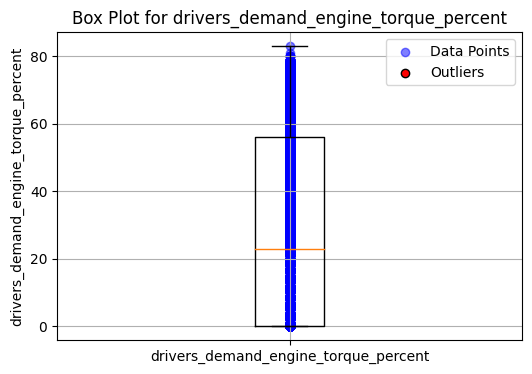

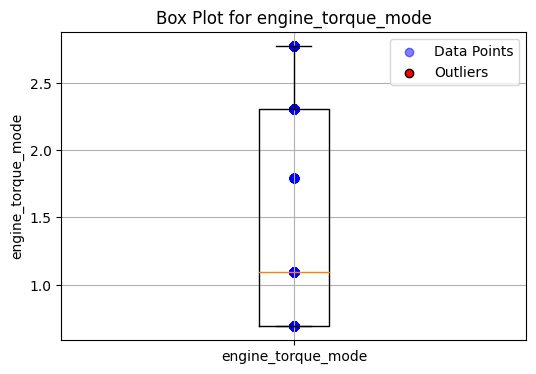

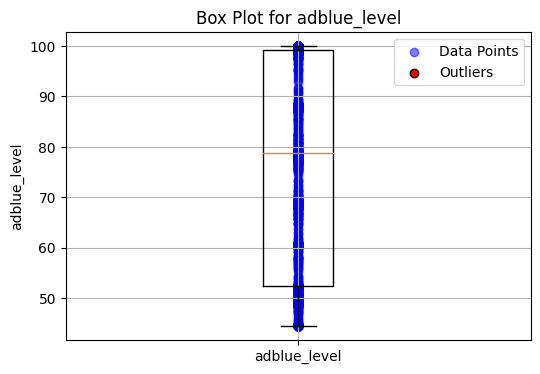

In [61]:
# As the distribution of data is handled, we will check outliers
# Visualizing Outliers using box plot for every feature


for column in numeric_columns:
    # Calculating Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Box plot
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column].dropna(), flierprops=dict(marker='o', color='red', markersize=5))
    
    # Scatter plot of all data points over box plot
    plt.scatter(np.ones_like(data[column].dropna()), data[column].dropna(), alpha=0.5, color='blue', label='Data Points')

    # Scatter plot of outliers 
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    plt.scatter(np.ones_like(outliers[column]), outliers[column], color='red', label='Outliers', edgecolor='black')

    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.xticks([1], [column])  
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [62]:
# Remove outliers for each numeric column
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


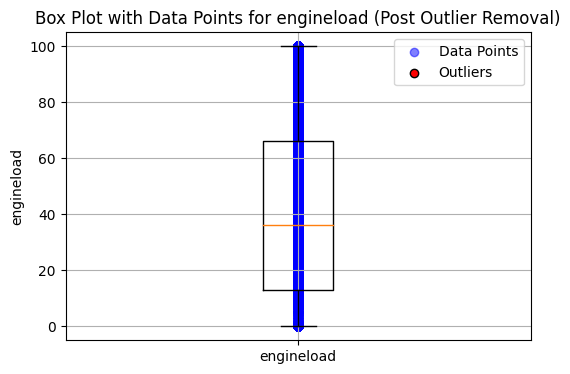

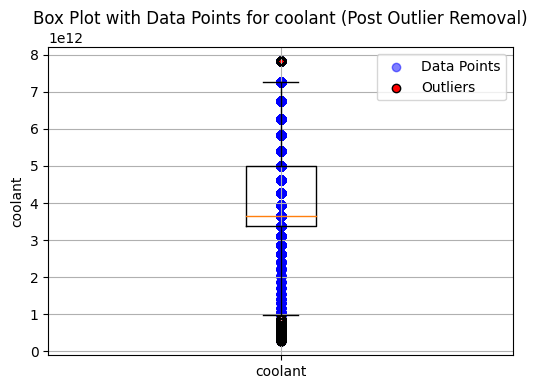

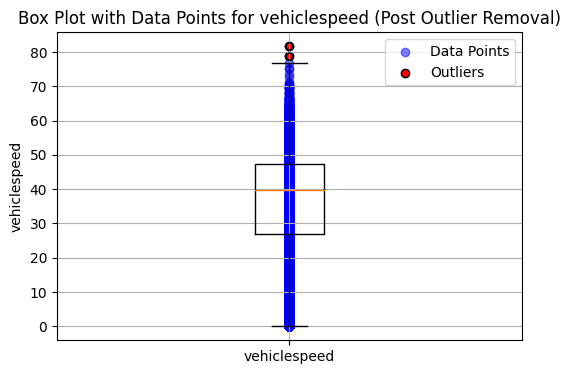

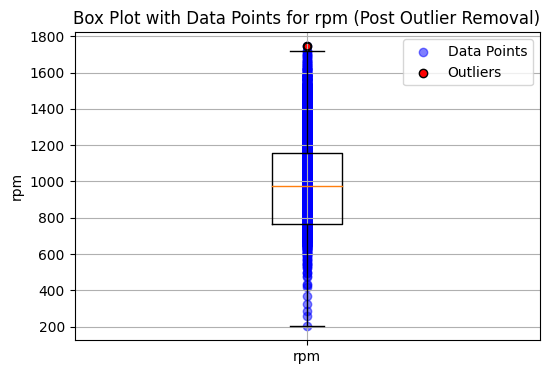

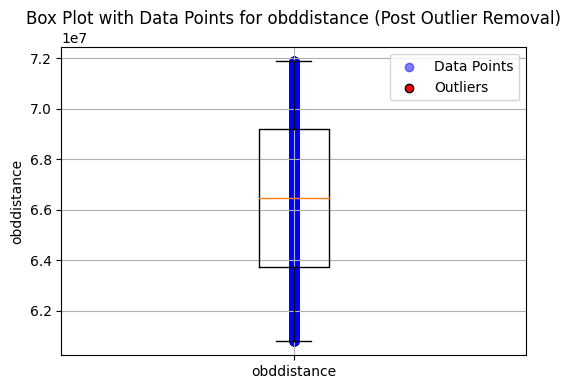

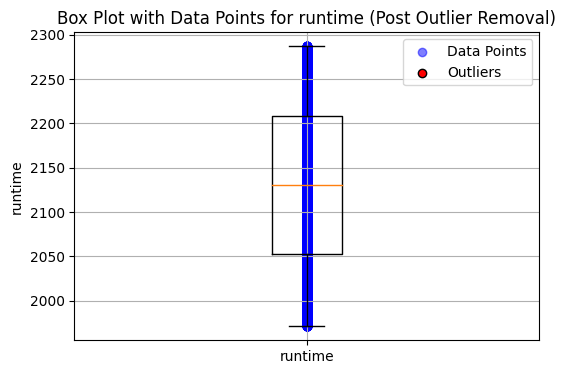

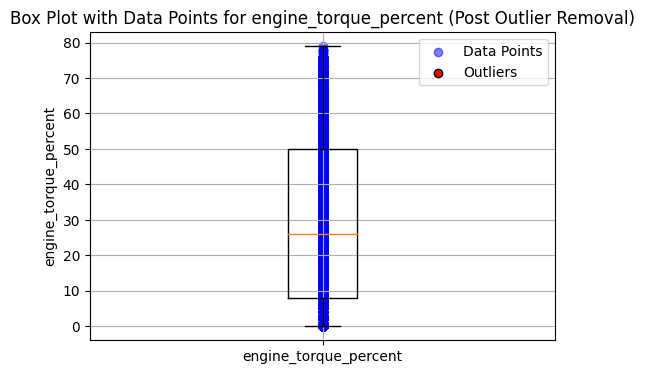

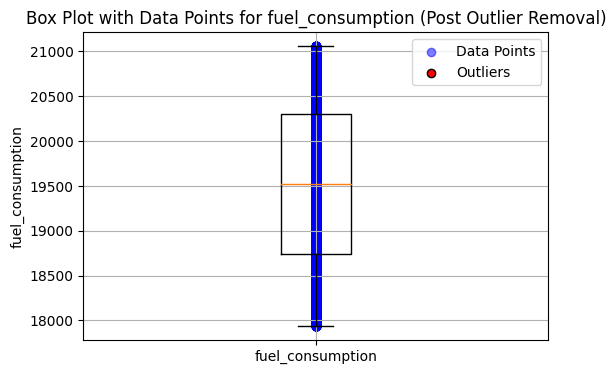

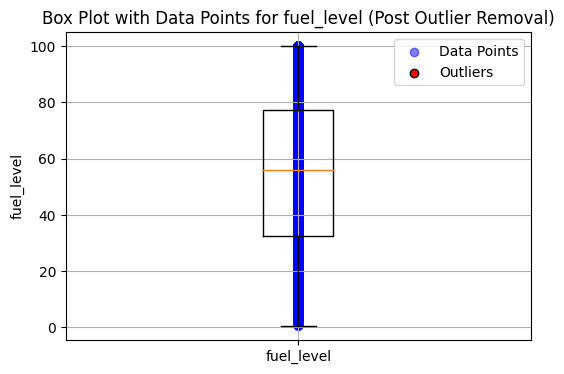

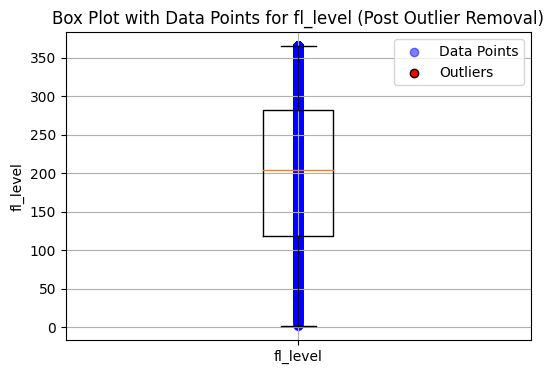

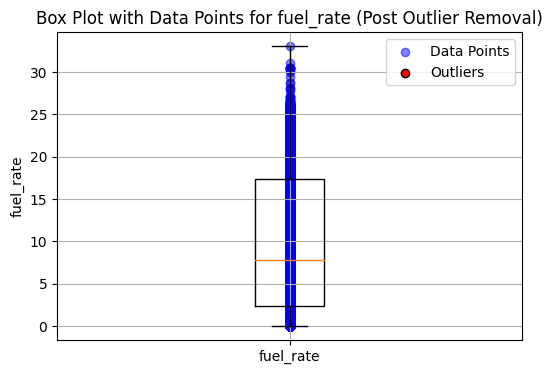

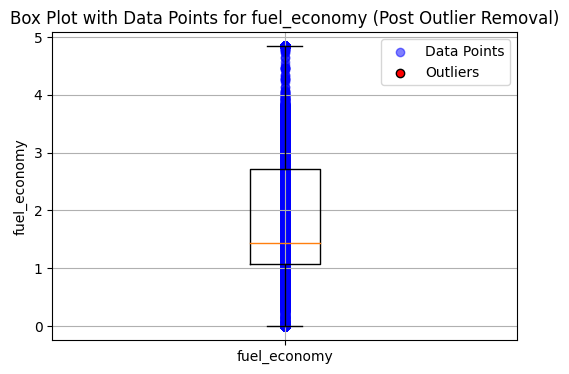

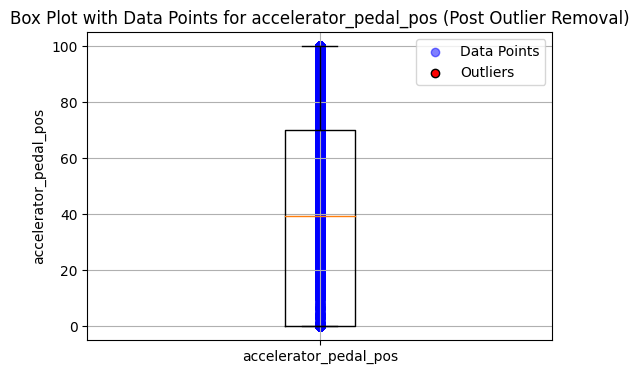

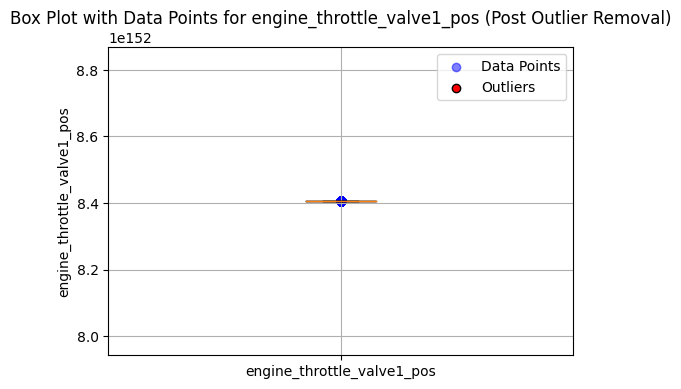

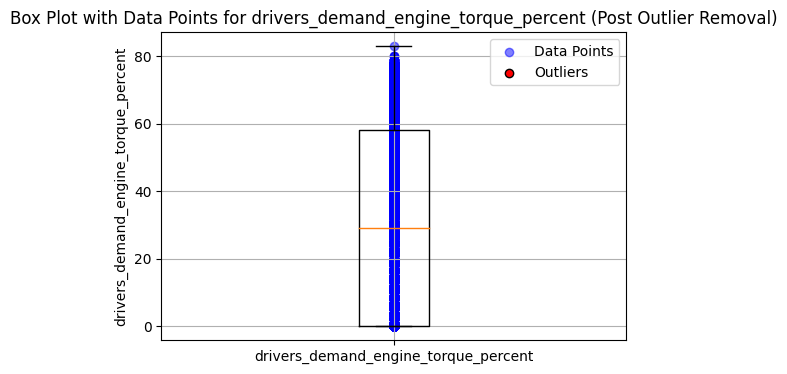

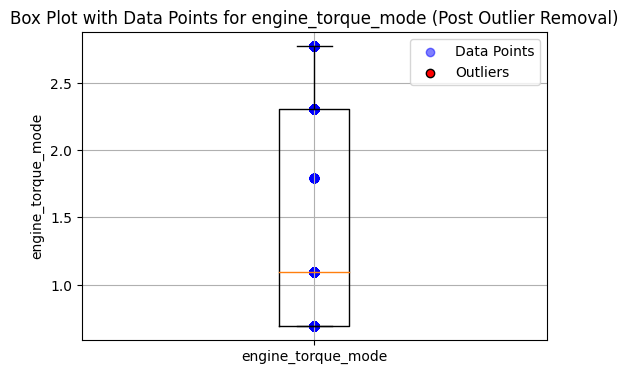

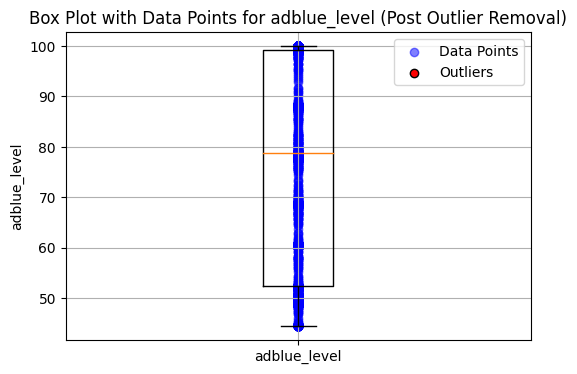

In [63]:
# Re-plotting box plots to confirm removal of outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Box plot with data points and outliers
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column].dropna(), flierprops=dict(marker='o', color='red', markersize=5))
    plt.scatter(np.ones_like(data[column].dropna()), data[column].dropna(), alpha=0.5, color='blue', label='Data Points')

    # Calculating outliers to confirm removal
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    plt.scatter(np.ones_like(outliers[column]), outliers[column], color='red', label='Outliers', edgecolor='black')

    plt.title(f'Box Plot with Data Points for {column} (Post Outlier Removal)')
    plt.ylabel(column)
    plt.xticks([1], [column])
    plt.legend()
    plt.grid(True)
    plt.show()


In [64]:
# After removing outliers the structure of the data will look as following
# We can observe that some records has been dropped (outliers)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15585 entries, 32 to 18433
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ts                                    15585 non-null  int64  
 1   lat                                   15585 non-null  float64
 2   lng                                   15585 non-null  float64
 3   engineload                            15585 non-null  int64  
 4   coolant                               15585 non-null  float64
 5   vehiclespeed                          15585 non-null  float64
 6   rpm                                   15585 non-null  float64
 7   obddistance                           15585 non-null  int64  
 8   runtime                               15585 non-null  float64
 9   engine_torque_percent                 15585 non-null  int64  
 10  current_gear                          15585 non-null  int64  
 11  fuel_consumption   

4. Exploratory Data Analysis

a. Analyzing individual features using Histogram


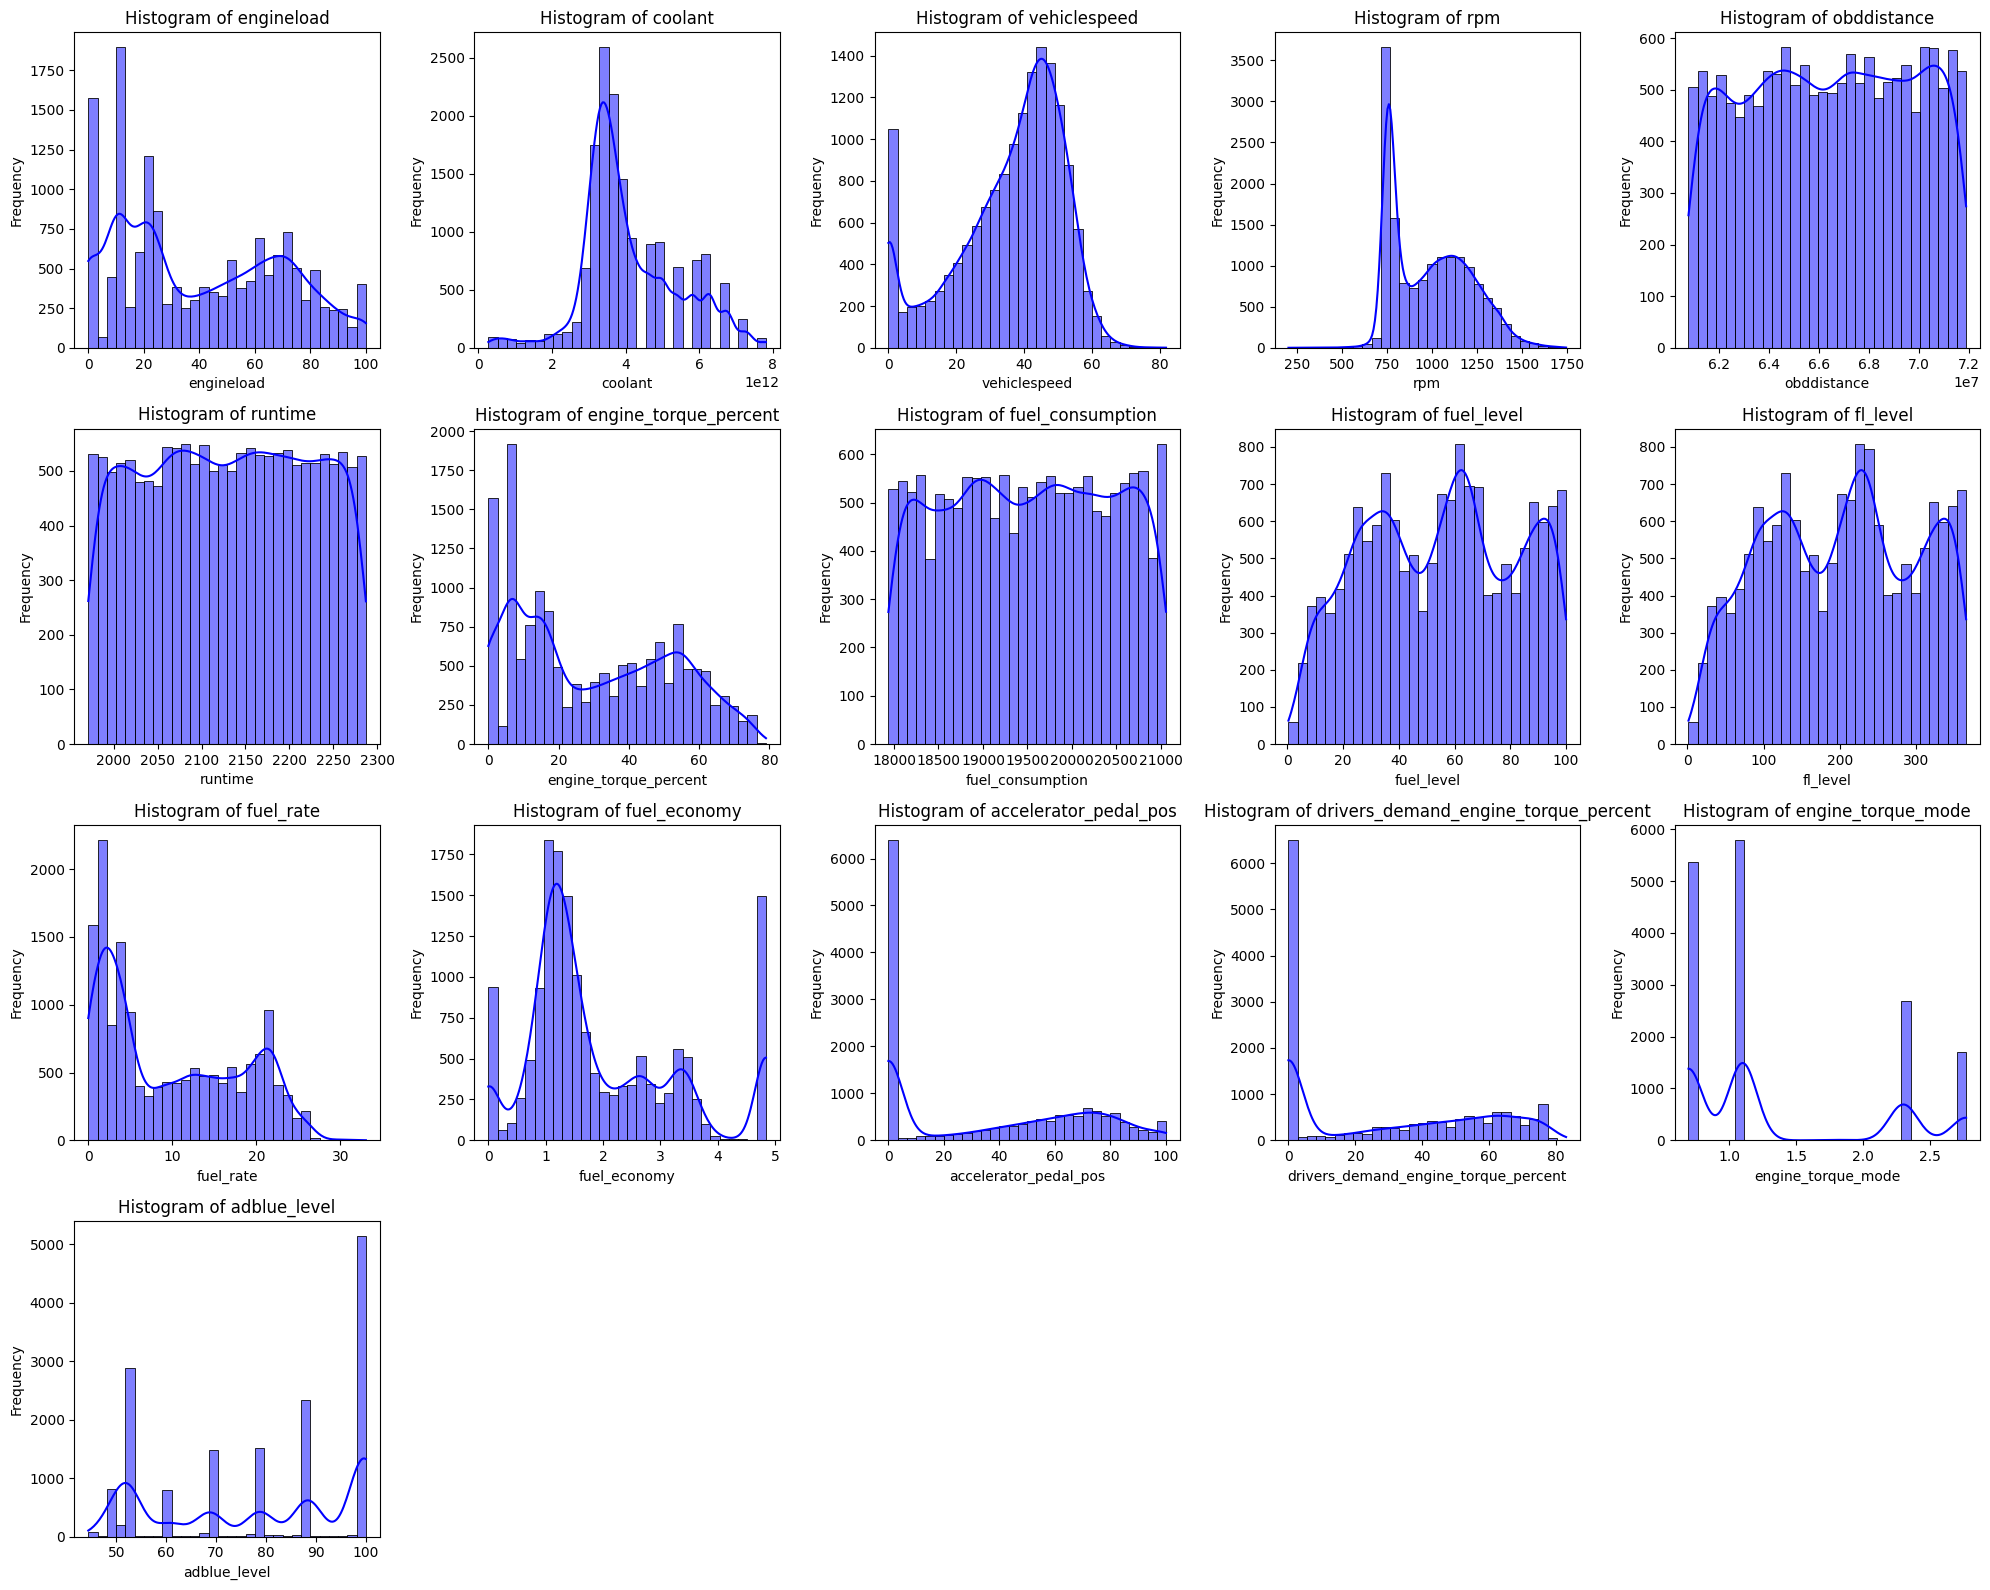

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# saving ts feature in temporary variable
data_ts = data['ts']
# List of numeric columns for histogram plotting
numeric_columns = [
    'engineload', 'coolant', 'vehiclespeed', 'rpm', 'obddistance', 'runtime', 
    'engine_torque_percent', 'fuel_consumption', 'fuel_level', 'fl_level', 
    'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 
    'drivers_demand_engine_torque_percent', 'engine_torque_mode', 'adblue_level'
]

# Ensure no NaNs or infinite values in the numeric columns
data = data[numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()

# Plot histograms for each numeric column
plt.figure(figsize=(20, 16))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


b. Analyzing individual features using Box plot

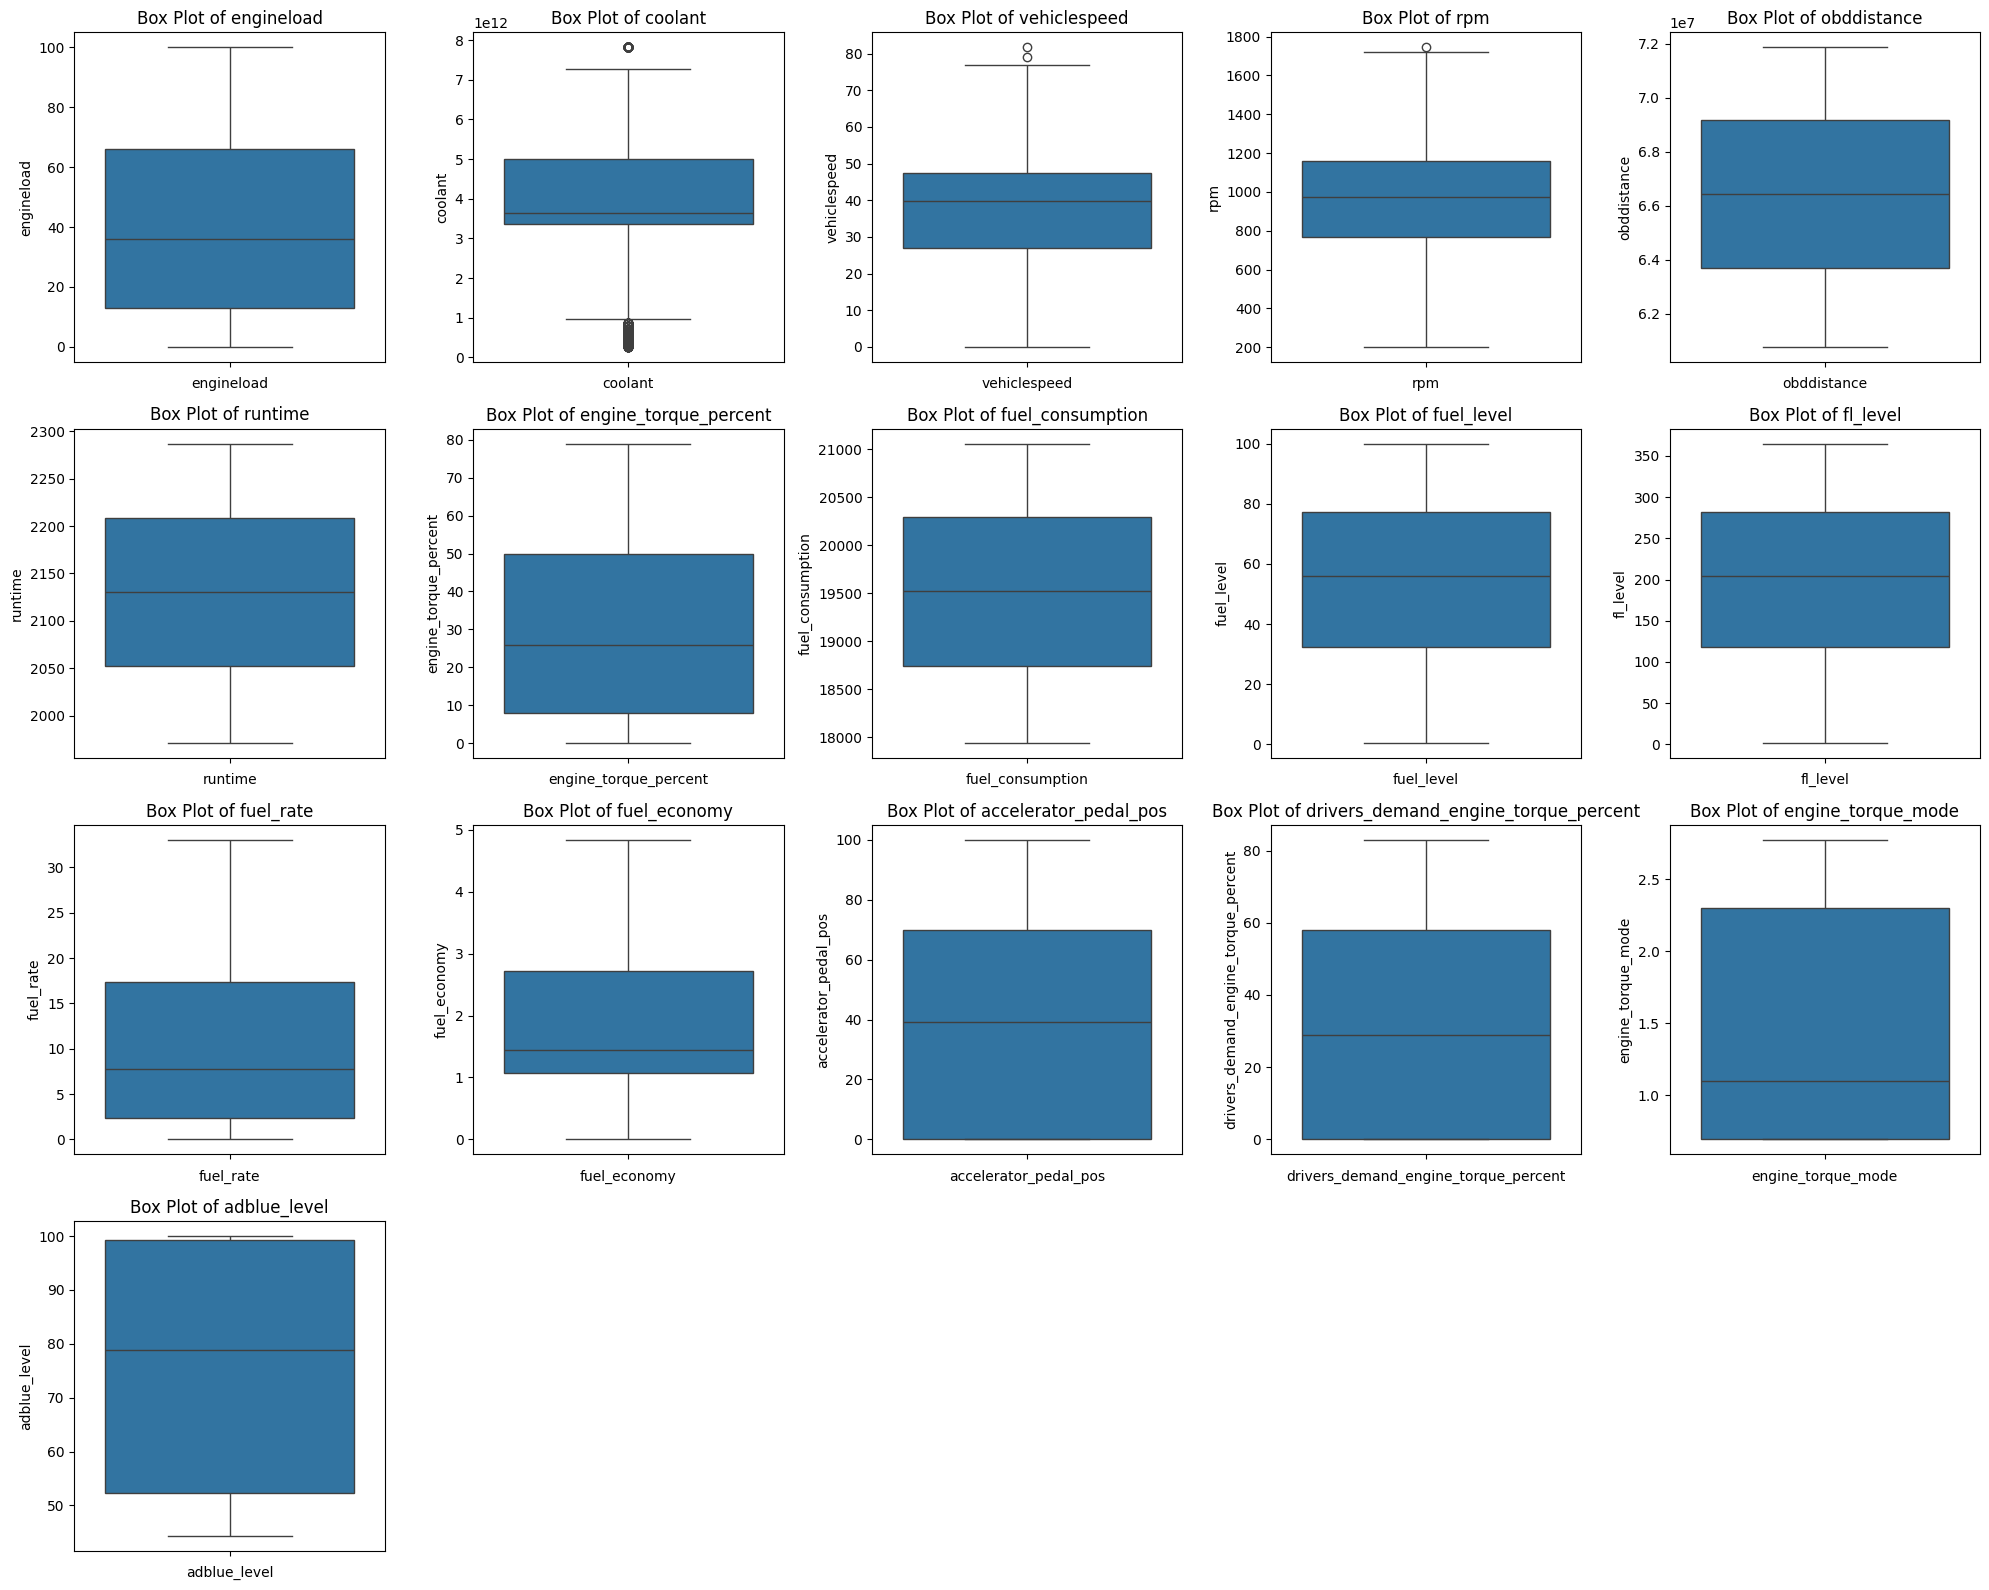

In [66]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


c. Analyzing relationships between different features

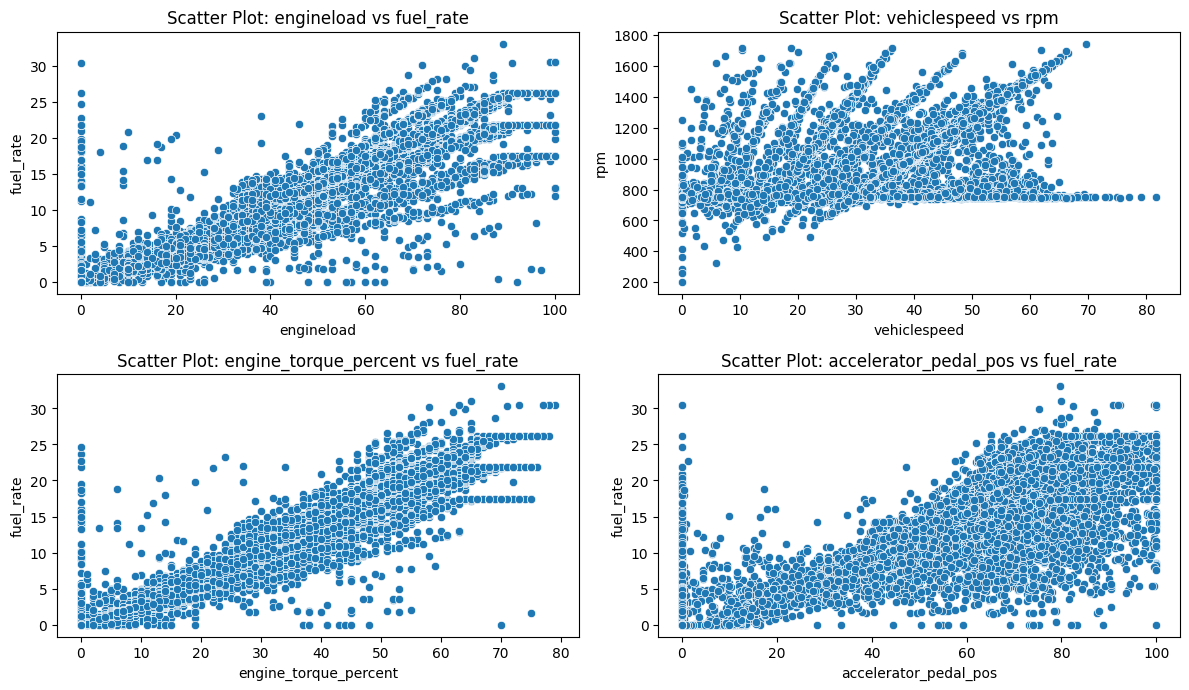

In [67]:
# List of pairs of columns to analyze
pairs_to_plot = [
    ('engineload', 'fuel_rate'),
    ('vehiclespeed', 'rpm'),
    ('engine_torque_percent', 'fuel_rate'),
    ('accelerator_pedal_pos','fuel_rate')
]

# Plot scatter plots for each pair
plt.figure(figsize=(12, 10)) 
for i, (x_col, y_col) in enumerate(pairs_to_plot, 1):
    plt.subplot(3, 2, i) 
    sns.scatterplot(x=data[x_col], y=data[y_col])
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()


d. Correlation matrix

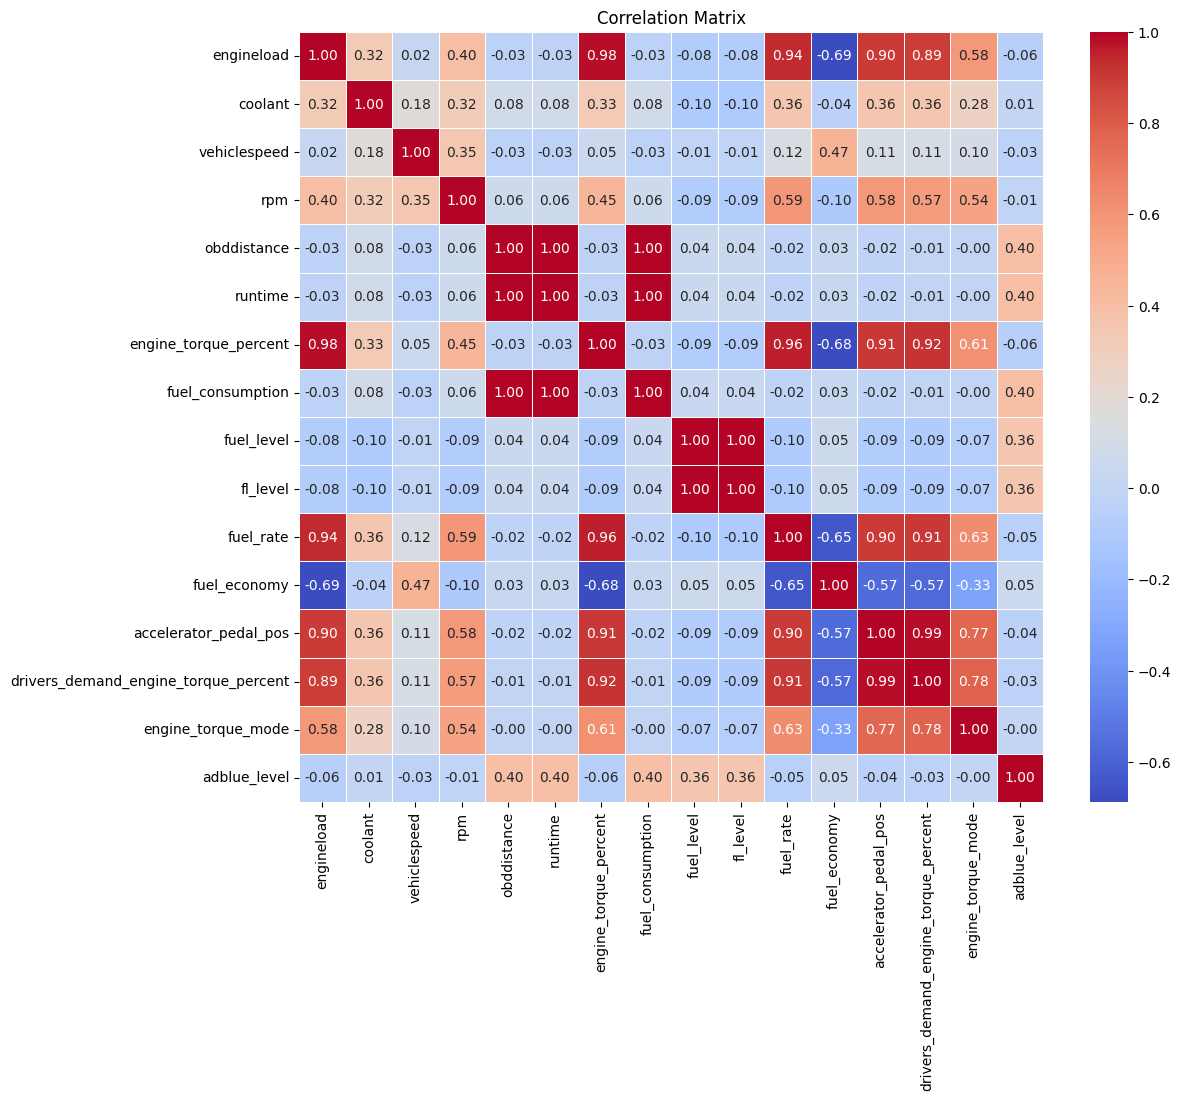

In [68]:
# Compute the correlation matrix
correlation_matrix = data.corr()

#correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

e. Pair plot

c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


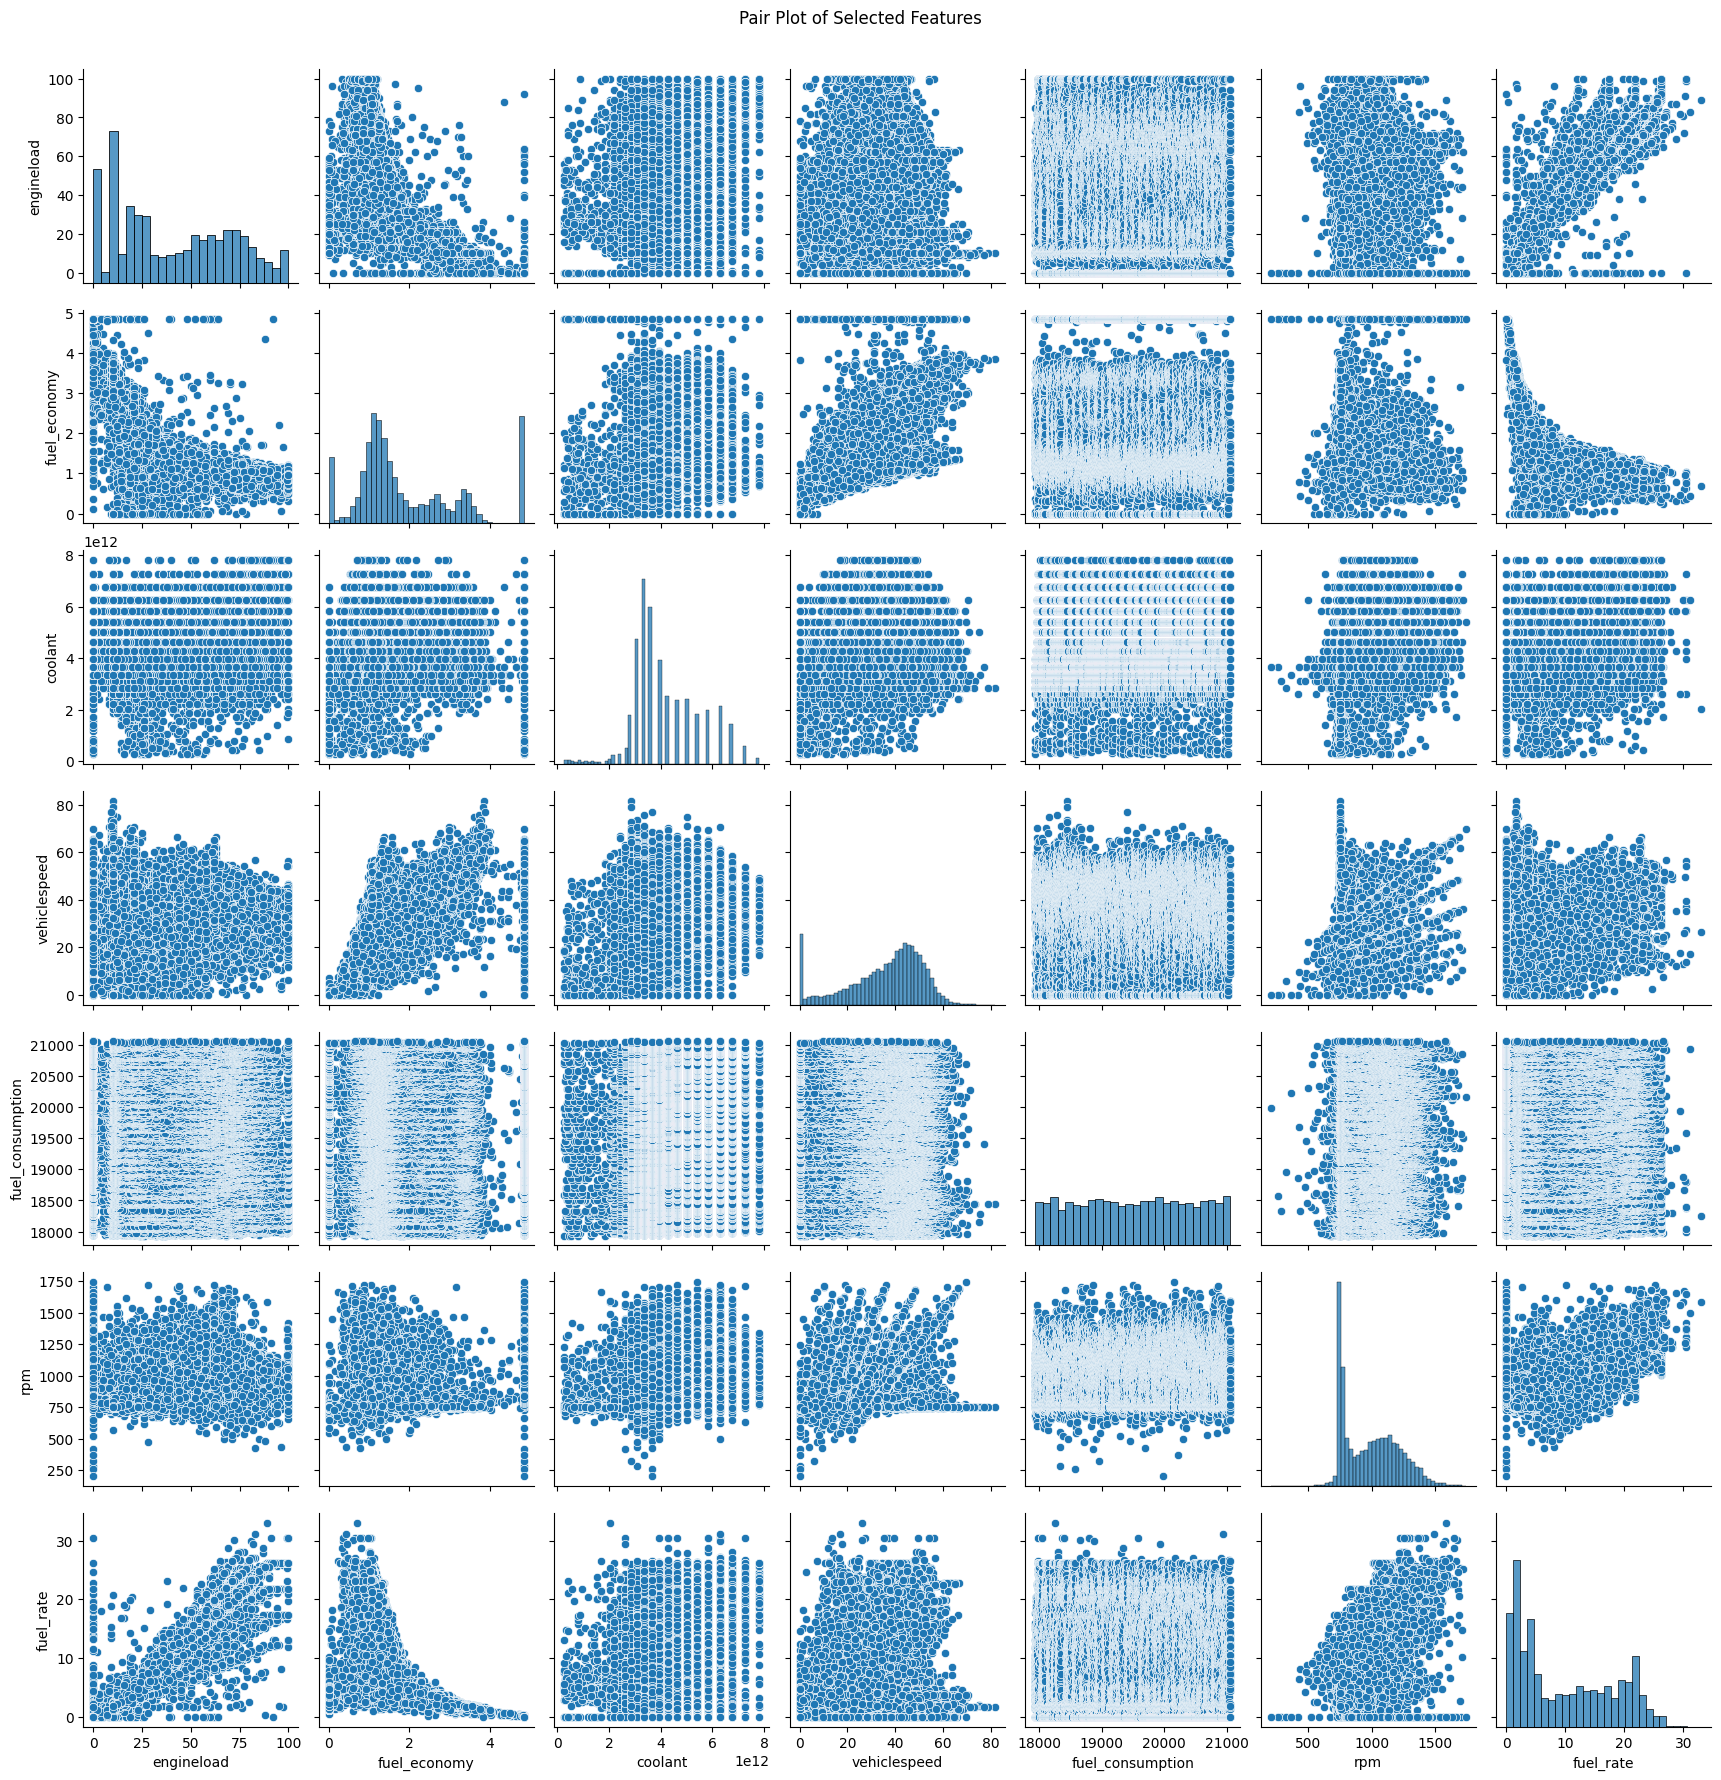

In [69]:
# Selected important features for the pair plot
selected_features = [
    'engineload', 'fuel_economy', 'coolant', 'vehiclespeed', 
    'fuel_consumption', 'rpm', 'fuel_rate'
]

# Create a pair plot of the selected features
sns.pairplot(data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [70]:
data.head()

engineload       coolant  vehiclespeed      rpm  obddistance  runtime  \
32          26  2.681026e+11      0.000000  749.500     60780976  1971.00   
33          35  4.710450e+11      2.484375  742.125     60781032  1971.00   
39          24  5.244608e+11      1.859375  752.375     60781592  1971.05   
40          26  7.932363e+11      8.781250  749.500     60781712  1971.10   
41          37  7.932363e+11     32.515625  817.000     60781824  1971.10   

    engine_torque_percent  fuel_consumption  fuel_level  fl_level  fuel_rate  \
32                     19           17936.5        22.4     81.76       4.90   
33                     24           17936.5        18.4     67.16       5.95   
39                     17           17937.0        23.2     84.68       4.40   
40                     18           17937.0        26.0     94.90       3.55   
41                     23           17937.0        22.8     83.22       6.05   

    fuel_economy  accelerator_pedal_pos  drivers_demand_engine_torque_percent  \
32      0.000000                    0.0                                     0   
33      0.357456                    9.6                                    10   
39      0.000000                    0.0                                     0   
40      1.216974                    0.0                                     0   
41      1.841293                   16.0                                     7   

    engine_torque_mode  adblue_level  
32            0.693147        52.252  
33            0.693147        52.252  
39            0.693147        52.252  
40            0.693147        52.252  
41            0.693147        52.260

4. Feature Engineering

a. Creating new features from existing ones

In [71]:
# we have timestamp (ts) feature, from that we can extract date in proper format

#first we have add 'ts' column again to the dataframe
data['ts'] = data_ts

# Convert the Unix timestamp to datetime
data['ts'] = pd.to_datetime(data['ts'], unit='s')
data['ts']


32      2024-03-02 02:24:32
33      2024-03-02 02:25:35
39      2024-03-02 04:05:07
40      2024-03-02 04:06:10
41      2024-03-02 04:13:48
                ...        
18429   2024-04-20 17:57:45
18430   2024-04-20 17:58:49
18431   2024-04-20 17:59:53
18432   2024-04-20 18:00:56
18433   2024-04-20 18:02:00
Name: ts, Length: 15585, dtype: datetime64[ns]

In [72]:
#We can create feature as different parts of the day

# Defining parts of the day
def get_part_of_day(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new column
data['part_of_day'] = data['ts'].dt.hour.apply(get_part_of_day)

# Display the first few rows to verify the changes
data[['ts', 'part_of_day']].sample(5)

ts part_of_day
15298 2024-04-14 11:30:29     Morning
2507  2024-03-07 22:23:39     Evening
2575  2024-03-07 23:36:34     Evening
12330 2024-04-06 10:55:22     Morning
901   2024-03-04 12:08:16   Afternoon

In [73]:
# Separate columns for date and time from the 'ts' column
data['date'] = data['ts'].dt.date 
data['time'] = data['ts'].dt.time   


data[['ts', 'date', 'time']].head() 


ts        date      time
32 2024-03-02 02:24:32  2024-03-02  02:24:32
33 2024-03-02 02:25:35  2024-03-02  02:25:35
39 2024-03-02 04:05:07  2024-03-02  04:05:07
40 2024-03-02 04:06:10  2024-03-02  04:06:10
41 2024-03-02 04:13:48  2024-03-02  04:13:48

In [74]:
# As we have extracted date and time from 'ts' we can drop the 'ts' column
data = data.drop(columns = 'ts')

b. Normalzing features

In [75]:
#considering columns where normalization is necessary since these have different range of values as compared to other features

columns_to_be_normalized = ['rpm','obddistance','runtime','fuel_consumption','fuel_rate']

#using MinMax scaler to transform this
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

data[columns_to_be_normalized] = sc.fit_transform(data[columns_to_be_normalized])

data[columns_to_be_normalized]



rpm  obddistance   runtime  fuel_consumption  fuel_rate
32     0.355014     0.000000  0.000000           0.00000   0.148260
33     0.350235     0.000005  0.000000           0.00000   0.180030
39     0.356877     0.000056  0.000158           0.00016   0.133132
40     0.355014     0.000066  0.000316           0.00016   0.107413
41     0.398753     0.000076  0.000316           0.00016   0.183056
...         ...          ...       ...               ...        ...
18429  0.481775     0.999834  0.999684           0.99984   0.257186
18430  0.602057     0.999867  0.999842           0.99984   0.000000
18431  0.355176     0.999932  0.999842           1.00000   0.055976
18432  0.401102     0.999968  0.999842           1.00000   0.281392
18433  0.365139     1.000000  1.000000           1.00000   0.364599

[15585 rows x 5 columns]

In [76]:
#final dataset
data.sample(5)

engineload       coolant  vehiclespeed       rpm  obddistance  \
16234          66  3.648265e+12     21.828125  0.541066     0.905345   
2490           63  4.626568e+12     25.296875  0.625304     0.139988   
13944          41  7.270454e+12     20.218750  0.524947     0.783165   
4481           20  3.364295e+12     40.734375  0.357039     0.258796   
11808          65  4.278186e+12     47.562500  0.645553     0.665857   

        runtime  engine_torque_percent  fuel_consumption  fuel_level  \
16234  0.901930                     50          0.902642        80.0   
2490   0.140304                     47          0.135308        34.0   
13944  0.774913                     29          0.777422        85.6   
4481   0.253084                     14          0.253483        98.4   
11808  0.660392                     50          0.659408        22.8   

       fl_level  fuel_rate  fuel_economy  accelerator_pedal_pos  \
16234    292.00   0.482602      0.859224                   62.0   
2490     124.10   0.518911      0.896566                   60.0   
13944    312.44   0.278366      1.162296                   40.0   
4481     359.16   0.081694      2.776731                    0.0   
11808     83.22   0.537065      1.296972                   64.0   

       drivers_demand_engine_torque_percent  engine_torque_mode  adblue_level  \
16234                                    50            1.098612        99.200   
2490                                     48            1.098612        52.312   
13944                                    30            1.098612        88.400   
4481                                      0            0.693147       100.000   
11808                                    52            2.302585        68.800   

      part_of_day        date      time  
16234   Afternoon  2024-04-16  16:17:33  
2490      Evening  2024-03-07  21:45:49  
13944     Evening  2024-04-09  22:12:12  
4481      Evening  2024-03-19  23:53:24  
11808   Afternoon  2024-04-05  14:24:01

In [77]:
data.to_csv('Vehicle_data_final.csv',index = False)